We have been working with data obtained from [GHCN (Global Historical Climatology Network)-Daily](http://www.ncdc.noaa.gov/oa/climate/ghcn-daily/) data. 

Convinient way to select data from there is to use [KNMI Climatological Service](http://climexp.knmi.nl/selectdailyseries.cgi?id)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
msk = pd.read_table('xgdcnRSM00027612.dat.txt', sep='\s*', skiprows=5, \
        parse_dates={'dates':[0, 1, 2]}, header=None, index_col=0, squeeze=True )

/Users/koldunov/miniconda/envs/cartopy/lib/python2.7/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


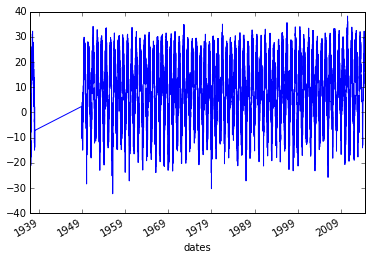

In [3]:
msk.plot()

##Exercise

- Select TMAX data set for your home city or nearby place
- Open it with pandas
- Plot data for 2000-2010
- Find maximum and minimum TMAX for all observational period
- Find mean temperature
- Plot monthly means
- Plot maximum/minimum temperatures for each month
- Plot seasonal mean for one of the seasons
- Plot overall monthly means (use groupby(msk.index.month))
- Plot daily season cycle ( use index.dayofyear )
- Plot daily seasonal cycle and +- standard deviation

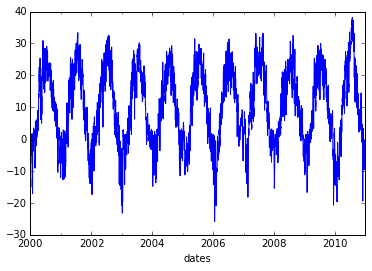

In [6]:
msk['2000':'2010'].plot()

In [7]:
msk.min()

-32.299999999999997

In [8]:
msk.max()

38.200000000000003

In [9]:
msk.mean()

9.2807769339898183

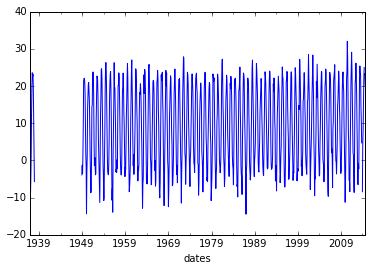

In [10]:
msk.resample('M').plot()

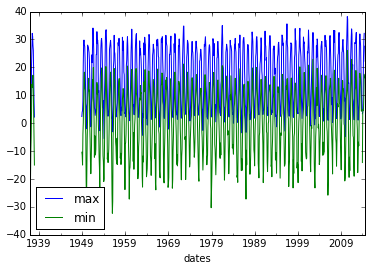

In [13]:
msk.resample('M',how=['max','min']).plot()

In [16]:
msk_s = msk.resample('Q-NOV')

In [19]:
msk_s[msk_s.index.quarter==1].mean()

-4.4326306006085412

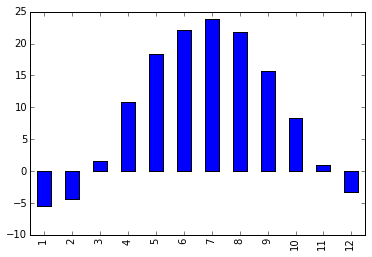

In [21]:
msk.groupby(msk.index.month).mean().plot(kind='bar')

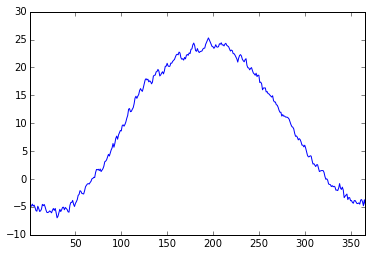

In [23]:
msk.groupby(msk.index.dayofyear).mean().plot()

In [24]:
seas = msk.groupby(msk.index.dayofyear).mean()
seas_plus = seas + msk.groupby(msk.index.dayofyear).std()
seas_minus = seas - msk.groupby(msk.index.dayofyear).std()

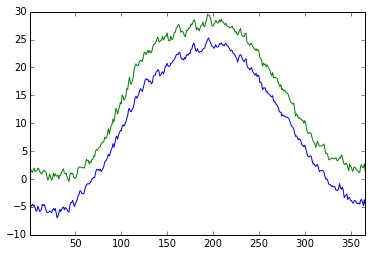

In [25]:
seas.plot()
seas_plus.plot()